In [1]:
#Import Python libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import csv
from pylab import *

import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB


np.random.seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load the dataframe

In [2]:
# load the dataframe we manipulated in part 1

df = pd.read_csv('dfrevised1.csv', index_col=0)
df.head()

,personality_type,posts,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm..."


In [3]:
#clean up the new column we don't need anymore

#df = df.drop(columns=['new'])
df = df.drop(columns=['posts'])
df.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized
0,INFJ,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten..."
1,ENTP,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex..."
2,INTP,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that..."
3,INTJ,I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd..."
4,ENTJ,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm..."


## Initial Setup for Naive Bayes Modeling/Random Forest Modeling


In [4]:
#Set up targets and tf-idf

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import string

Since we have way more data for I than E, let's just assume I is the default 0 case and E can be the 1 case. Assuming 50/50 split in real life. 

In [5]:
#define a function to appropriately label extrovert/introvert tendencies

def label(energy_in):
    energy_out = 0
    if energy_in == 'I':
        energy_out = 0
    elif energy_in == 'E':
        energy_out = 1
    return energy_out


In [6]:
df.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized
0,INFJ,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten..."
1,ENTP,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex..."
2,INTP,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that..."
3,INTJ,I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd..."
4,ENTJ,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm..."


In [7]:
df['energyquant'] =  df['energy'].apply(lambda  x: label(x))

In [8]:
df.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized,energyquant
0,INFJ,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten...",0
1,ENTP,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex...",1
2,INTP,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that...",0
3,INTJ,I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd...",0
4,ENTJ,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm...",1


In [9]:
print (df[df.energyquant == 0].count())

print (df[df.energyquant == 1].count())

personality_type           6676
energy                     6676
lower_posts                6676
stopwords                  6676
lower_posts2               6676
lower_postsnostopwords     6676
lower_postsnostopwords2    6676
new                        6676
lower_postswithoutpunc     6676
lower_postsnolinks         6676
char_count                 6676
text_lemmatized            6676
energyquant                6676
dtype: int64
personality_type           1999
energy                     1999
lower_posts                1999
stopwords                  1999
lower_posts2               1999
lower_postsnostopwords     1999
lower_postsnostopwords2    1999
new                        1999
lower_postswithoutpunc     1999
lower_postsnolinks         1999
char_count                 1999
text_lemmatized            1999
energyquant                1999
dtype: int64


In [10]:
#setting our target & features 
X = df['text_lemmatized']
y = df['energyquant'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english')

In [11]:
#TD-IF let's vectorize these texts

# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data

def tfidf(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [12]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

#setting external variable

In [13]:
print(tf_idf_train.shape)
print(tf_idf_test.shape)

#6506 people, 252,768 unique words 

(6506, 252768)
(2169, 252768)


In [14]:
#training some classifiers 

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=50)

In [15]:
# a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train): 
    classifier.fit(tf_idf_train, y_train) #fitting this to vectorized data
    train_preds = classifier.predict(tf_idf_train) #making predictions for specific data points 
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds #return predictions

## Naive Bayes model 0.0

In [16]:
# generate predictions with Naive Bayes Classifier # setting external variable again and specifying NB classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#decent accuracy score; we have a lot of true positives. what does this mean?  we have so many positive tweets
print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

# accuracy 

[[1680    0]
 [ 489    0]]
0.7745504840940526
Classification Matrix:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1680
           1       0.00      0.00      0.00       489

    accuracy                           0.77      2169
   macro avg       0.39      0.50      0.44      2169
weighted avg       0.60      0.77      0.68      2169



/Users/wildalaska/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
tn, fp, fn, tp

(1680, 0, 489, 0)

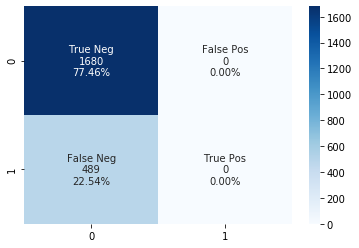

In [18]:
#running another confusion matrix

nb_matrix = confusion_matrix(y_test, nb_test_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     nb_matrix.flatten()/np.sum(nb_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues')

## Random Forest 0.0

In [19]:
# generate predictions with Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Random Forest Classifier
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))
print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

[[1679    1]
 [ 488    1]]
0.7745504840940526
Classification Matrix:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1680
           1       0.50      0.00      0.00       489

    accuracy                           0.77      2169
   macro avg       0.64      0.50      0.44      2169
weighted avg       0.71      0.77      0.68      2169



In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
tn, fp, fn, tp

(1679, 1, 488, 1)

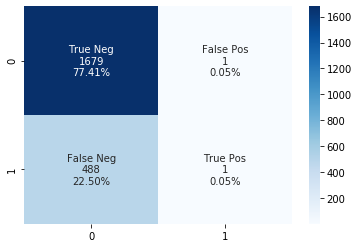

In [21]:
#running another confusion matrix

rf_matrix = confusion_matrix(y_test, rf_test_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     rf_matrix.flatten()/np.sum(rf_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_matrix, annot=labels, fmt='', cmap='Blues')

# Metrics 

Now let's decide what this means and what to prioritize in the classification matrix.

Precision - out of all the true positive and false positive (all the people we labelled extrovert), 80% were true positives and were extroverts, and the other 20% were introverts but we thought they were extroverts

Recall - out of all the true positives and false negative (all actual introverts), we got 90% true positives which were actually extroverts, and 10% we missed - false negatives - they were extroverts and we thought they were introverts 

Which error is worse? 

Let's optimize for F1 score.

Does it matter much here? Use case is trying to figure out how to match people as part of a friendship algorithm, either or isn't necessarily better.  


Introversion is different than being shy (fear of social judgment), it is more about how one responds to stimulation, including social stimulation. Introverts feel more content with less outside stimulation (for example, talking with a close friend or reading a book) compared to extroverts who enjoy more outside stimulation (for example, going to parties and listening to loud music)


There are a number of metrics which can be used to evaluate a binary classification model, and accuracy is one of the simplest to understand. Accuracy is defined as simply the number of correctly categorized examples divided by the total number of examples. Accuracy can be useful but does not take into account the subtleties of class imbalances, or differing costs of false negatives and false positives.

The F1-score is useful:

• where there are either differing costs of false positives or false negatives, such as in the mammogram example

• or where there is a large class imbalance, such as if 10% of apples on trees tend to be unripe. In this case the accuracy would be misleading, since a classifier that classifies all apples as ripe would automatically get 90% accuracy but would be useless for real-life applications.

The accuracy has the advantage that it is very easily interpretable, but the disadvantage that it is not robust when the data is unevenly distributed, or where there is a higher cost associated with a particular type of error.

## Smote to solve for class imbalance

In [22]:

#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled, y_train_resampled = smote.fit_sample(tf_idf_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution: 

0    6676
1    1999
Name: energyquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    4996
0    4996
Name: energyquant, dtype: int64


## NB 1.0

In [23]:
nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#hmm the f1 score actually went down to .74 from .87
#but now it's actually classifying stuff as positive aka extrovert versus before when there were no extroverts 
#classified so this counts as progress

#looks overfit

Multinomial Naive Bayes
Training Accuracy: 0.9157 		 Testing Accuracy: 0.6547

[[1063  617]
 [ 132  357]]
0.6546795758414016
1063 617 132 357
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1680
           1       0.37      0.73      0.49       489

    accuracy                           0.65      2169
   macro avg       0.63      0.68      0.61      2169
weighted avg       0.77      0.65      0.68      2169



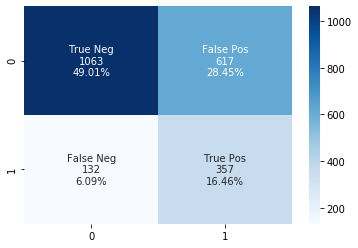

In [24]:
nb_matrix = confusion_matrix(y_test, nb_test_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     nb_matrix.flatten()/np.sum(nb_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues')

## RF 1.0

In [25]:
rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))


#now we're back at .87 for f1, but there are 0 false positives and only 1 true positive - almost none labelled as
#positive, which is concerning

#looks incredibly overfit - this is not a good model


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7769

[[1680    0]
 [ 484    5]]
0.776855693868142
tn, fp, fn, tp 	 	
1680 0 484 5
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1680
           1       1.00      0.01      0.02       489

    accuracy                           0.78      2169
   macro avg       0.89      0.51      0.45      2169
weighted avg       0.83      0.78      0.68      2169



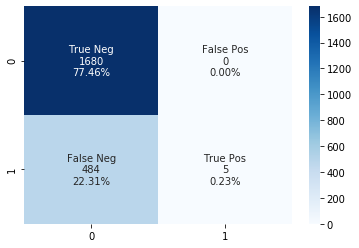

In [26]:
rf_matrix = confusion_matrix(y_test, rf_test_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     rf_matrix.flatten()/np.sum(nb_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_matrix, annot=labels, fmt='', cmap='Blues')

## Improve on models - change train-test split to correct for class imbalance further

Let's try changing train_test_split - the default is .25 test size, let's increase that.

In [27]:
def tfidf2(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [28]:
tf_idf_train2, tf_idf_test2, y_train2, y_test2, vectorizer2 = tfidf2(X, y, stopwords_list)


In [29]:
#re-smoting the new train test split

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled2, y_train_resampled2 = smote.fit_sample(tf_idf_train2, y_train2) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled2).value_counts())

Original class distribution: 

0    6676
1    1999
Name: energyquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    4452
0    4452
Name: energyquant, dtype: int64


## Let's try it out RF 2.0

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=50)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7775

[[2224    0]
 [ 637    2]]
0.7775061124694377
tn, fp, fn, tp 	 	
2224 0 637 2
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2224
           1       1.00      0.00      0.01       639

    accuracy                           0.78      2863
   macro avg       0.89      0.50      0.44      2863
weighted avg       0.83      0.78      0.68      2863



## NB 2.0

In [31]:
#try this out on Naive bayes model


nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))

#doesn't seem to help w/being overfit; f score now .78, up a few points from .74 earlier 
#the weighted average f1 score is up from .68!


Multinomial Naive Bayes
Training Accuracy: 0.9283 		 Testing Accuracy: 0.6923

[[1531  693]
 [ 188  451]]
0.6922808243101641
1531 693 188 451
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2224
           1       0.39      0.71      0.51       639

    accuracy                           0.69      2863
   macro avg       0.64      0.70      0.64      2863
weighted avg       0.78      0.69      0.72      2863



## start with RF hyperparameter tuning optimize for f1

In [32]:
#play with max depth

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=6)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))

#eh still not predicting any postives... might have to abandon RF eventually haha

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7775

[[2224    0]
 [ 637    2]]
0.7775061124694377
tn, fp, fn, tp 	 	
2224 0 637 2
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2224
           1       1.00      0.00      0.01       639

    accuracy                           0.78      2863
   macro avg       0.89      0.50      0.44      2863
weighted avg       0.83      0.78      0.68      2863



In [33]:
#play with number of estimators

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=300, random_state=50)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))

#n of estimators still doesn't help!

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7775

[[2224    0]
 [ 637    2]]
0.7775061124694377
tn, fp, fn, tp 	 	
2224 0 637 2
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2224
           1       1.00      0.00      0.01       639

    accuracy                           0.78      2863
   macro avg       0.89      0.50      0.44      2863
weighted avg       0.83      0.78      0.68      2863



## Changing number of samples in RF


In [34]:
rf = RandomForestClassifier(n_estimators=300, random_state=50, max_samples = 8)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))

#doesn't help

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7775

[[2224    0]
 [ 637    2]]
0.7775061124694377
tn, fp, fn, tp 	 	
2224 0 637 2
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2224
           1       1.00      0.00      0.01       639

    accuracy                           0.78      2863
   macro avg       0.89      0.50      0.44      2863
weighted avg       0.83      0.78      0.68      2863



## NB and changing alpha values

Let's try using NB instead, with the new train test split.

In [35]:
nb = MultinomialNB(alpha=.1)

nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))

#nothing changes w alpha value changing


Multinomial Naive Bayes
Training Accuracy: 0.9283 		 Testing Accuracy: 0.6923

[[1531  693]
 [ 188  451]]
0.6922808243101641
1531 693 188 451
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2224
           1       0.39      0.71      0.51       639

    accuracy                           0.69      2863
   macro avg       0.64      0.70      0.64      2863
weighted avg       0.78      0.69      0.72      2863



In [36]:
# 1531 693 188 451

In [37]:
#try using class prior feature

nb = MultinomialNB(class_prior=1)

nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))

#this didn't help either

Multinomial Naive Bayes
Training Accuracy: 0.9283 		 Testing Accuracy: 0.6923

[[1531  693]
 [ 188  451]]
0.6922808243101641
1531 693 188 451
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2224
           1       0.39      0.71      0.51       639

    accuracy                           0.69      2863
   macro avg       0.64      0.70      0.64      2863
weighted avg       0.78      0.69      0.72      2863



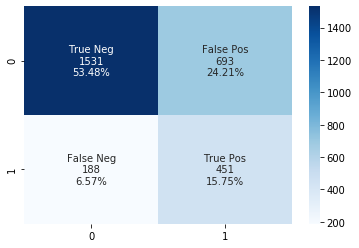

In [38]:
#running another confusion matrix

nb_matrix = confusion_matrix(y_test2, nb_test_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     nb_matrix.flatten()/np.sum(nb_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues')

**because there is a large class imbalance to start with, accuracy matters less vs the f1 score
it appears to be better than random guessing** . look at the weighted average of the f1 scores

## Try oversampling instead of SMOTE - come back to this later if desired

In [39]:
# from sklearn.utils import resample

# # Separate input features and target

# X = df['text_lemmatized']
# y = df['energyquant'] 


# # setting up testing and training sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

# # concatenate our training data back together
# X = pd.concat([X_train, y_train], axis=1)

# # separate minority and majority classes
# introvert = X[X.energyquant==0] #majority
# extrovert = X[X.energyquant==1]

# # upsample minority ******
# extrovert_upsampled = resample(extrovert,
#                           replace=True, # sample with replacement
#                           n_samples=len(introvert), # match number in majority class
#                           random_state=27) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([introvert, extrovert_upsampled])

# # check new class counts
# upsampled.energyquant.value_counts()
  

In [40]:
# upsampled.head()

try undersampling

## RF 3.0 undersample 

In [41]:
# introvert_downsampled = resample(introvert,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(extrovert), # match minority n
#                                 random_state = 27) # reproducible results

# # combine minority and downsampled majority
# downsampled = pd.concat([introvert_downsampled, extrovert])

# # checking counts
# downsampled.energyquant.value_counts()
   

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)


In [43]:
# rf = RandomForestClassifier(n_estimators=100, random_state=50)

# rf_classifier.fit(X_train, y_train)
# rf_train_preds = rf_classifier.predict(X_train)
# rf_test_preds = rf_classifier.predict(X_test)


# rf_train_score = accurac=y_score(y_train, rf_train_preds)
# rf_test_score = accuracy_score(y_test, rf_test_preds)


# print("Random Forest")
# print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
# print("")

# # evaluate performance of Naive Bayes Classifier
# print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
# print(accuracy_score(y_test, rf_test_preds)) 


# tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
# print("tn, fp, fn, tp \t \t")

# print(tn, fp, fn, tp)

# print('Classification Matrix:')
# print(classification_report(y_test, rf_test_preds))


# -----------
#come BACK TO THIS LATER IF TIME - couldn't figure out over/under sampling


In [44]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.metrics import accuracy_score 
# model = LogisticRegression()
# # model.fit(X, y)
# predicted_classes = model.predict(X)
# accuracy = accuracy_score(y.flatten(),predicted_classes)
# parameters = model.coef_

In [45]:
# y_train = downsampled.energyquant
# X_train = downsampled.text_lemmatized

# # drop('Class', axis=1)

# # y = downsampled.energyquant
# # X = downsampled.text_lemmatized

# undersampled = model.fit(X_train, y_train)

# undersampled_pred = undersampled.predict(X_test)

# # Checking accuracy
# accuracy_score(y_test, undersampled_pred)
    

# # f1 score
# f1_score(y_test, undersampled_pred)


# recall_score(y_test, undersampled_pred)
  

In [46]:
df.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized,energyquant
0,INFJ,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten...",0
1,ENTP,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex...",1
2,INTP,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that...",0
3,INTJ,I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd...",0
4,ENTJ,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm...",1


## making extrovert df 

In [47]:
# energies = df['energyquant']
# df2 = df.drop(['energyquant',  'personality_type','lower_posts','stopwords','lower_posts2','lower_postsnostopwords','lower_postsnostopwords2','new','lower_postswithoutpunc','lower_postsnolinks','char_count'], axis=1)
# df2.head()

In [48]:
# dfex = df.drop['energyquant' == 0]

# dfex = df.drop(['energyquant'] != 0)

dfex = df[df['energyquant'] != 0]



In [49]:
dfex.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized,energyquant
1,ENTP,E,'i'm finding the lack of me in these posts ver...,556,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,'i'm finding lack posts alarming.|||sex boring...,im finding lack posts alarmingsex boring posit...,im finding lack posts alarmingsex boring posit...,3897,"['im', 'finding', 'lack', 'post', 'alarmingsex...",1
4,ENTJ,E,'you're fired.|||that's another silly misconce...,472,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,'you're fired.|||that's another silly misconce...,youre firedthats another silly misconception a...,youre firedthats another silly misconception a...,3452,"['youre', 'firedthats', 'another', 'silly', 'm...",1
11,ENFJ,E,'https://www.youtube.com/watch?v=plaaikvhvzs||...,370,'https://www.youtube.com/watch?v=plaaikvhvzs||...,'https://www.youtube.com/watch?v=plaaikvhvzs||...,'https://www.youtube.com/watch?v=plaaikvhvzs||...,'https://www.youtube.com/watch?v=plaaikvhvzs||...,httpswwwyoutubecomwatchvplaaikvhvzs51 oi went ...,oi went break months ago together 4 years pla...,2809,"['oi', 'went', 'break', 'month', 'ago', 'toget...",1
22,ENTJ,E,'now i'm interested. but too lazy to go resear...,492,"'now i'm interested. lazy go research it, time...","'now i'm interested. lazy go research it, time...","'now i'm interested. lazy go research it, time...","'now i'm interested. lazy go research it, time...",now im interested lazy go research it timecons...,now im interested lazy go research it timecons...,4487,"['now', 'im', 'interested', 'lazy', 'go', 'res...",1
24,ENTJ,E,'still going strong at just over the two year ...,539,'still going strong two year mark. made notice...,'still going strong two year mark. made notice...,'still going strong two year mark. made notice...,'still going strong two year mark. made notice...,still going strong two year mark made noticeab...,still going strong two year mark made noticeab...,3709,"['still', 'going', 'strong', 'two', 'year', 'm...",1


In [50]:
dfex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 8671
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   personality_type         1999 non-null   object
 1   energy                   1999 non-null   object
 2   lower_posts              1999 non-null   object
 3   stopwords                1999 non-null   int64 
 4   lower_posts2             1999 non-null   object
 5   lower_postsnostopwords   1999 non-null   object
 6   lower_postsnostopwords2  1999 non-null   object
 7   new                      1999 non-null   object
 8   lower_postswithoutpunc   1999 non-null   object
 9   lower_postsnolinks       1999 non-null   object
 10  char_count               1999 non-null   int64 
 11  text_lemmatized          1999 non-null   object
 12  energyquant              1999 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 218.6+ KB


In [51]:
dfex2 = dfex.drop(['personality_type','lower_posts','stopwords','lower_posts2','lower_postsnostopwords','lower_postsnostopwords2','new','lower_postswithoutpunc','char_count'], axis=1)


In [52]:
dfex2.head()

,energy,lower_postsnolinks,text_lemmatized,energyquant
1,E,im finding lack posts alarmingsex boring posit...,"['im', 'finding', 'lack', 'post', 'alarmingsex...",1
4,E,youre firedthats another silly misconception a...,"['youre', 'firedthats', 'another', 'silly', 'm...",1
11,E,oi went break months ago together 4 years pla...,"['oi', 'went', 'break', 'month', 'ago', 'toget...",1
22,E,now im interested lazy go research it timecons...,"['now', 'im', 'interested', 'lazy', 'go', 'res...",1
24,E,still going strong two year mark made noticeab...,"['still', 'going', 'strong', 'two', 'year', 'm...",1


In [53]:

post_str = ' '.join(dfex2['lower_postsnolinks'].tolist())

print (type(post_str))

<class 'str'>


In [54]:
#let's tokenize some stuff - bag of words

tokens = nltk.word_tokenize(post_str)
print(len(tokens))


1331044


In [55]:
tokens_pos = nltk.pos_tag(tokens) #tagging pos in all the tokens plus the individual words themselves

In [57]:
# macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
# macbeth_stopped_freqdist.most_common(50)

# get freq dist of all the words in extroverts - not filtered

fdist_pos3 = nltk.FreqDist(tokens_pos) #making frequency dist
top_100_words3 = fdist_pos3.most_common(100)
print(top_100_words3)

[(('!', '.'), 22601), (('like', 'IN'), 15040), (('people', 'NNS'), 10123), (('think', 'VBP'), 8495), (('really', 'RB'), 7877), (('one', 'CD'), 7829), (('would', 'MD'), 7671), (('im', 'NN'), 6854), (('know', 'VBP'), 5806), (('time', 'NN'), 5639), (('it', 'PRP'), 5177), (('me', 'PRP'), 5007), (('im', 'JJ'), 5004), (('ive', 'JJ'), 4441), (('things', 'NNS'), 4421), (('good', 'JJ'), 4409), (('way', 'NN'), 4322), (('also', 'RB'), 4007), (('get', 'VB'), 4004), (('something', 'NN'), 3990), (('well', 'RB'), 3909), (('much', 'JJ'), 3762), (('always', 'RB'), 3732), (('say', 'VBP'), 3564), (('even', 'RB'), 3517), (('you', 'PRP'), 3441), (('could', 'MD'), 3415), (('someone', 'NN'), 3341), (('thing', 'NN'), 3267), (('want', 'VBP'), 3202), (('never', 'RB'), 3131), (('lot', 'NN'), 3066), (('life', 'NN'), 2988), (('actually', 'RB'), 2893), (('going', 'VBG'), 2854), (('though', 'IN'), 2831), (('type', 'NN'), 2727), (('friends', 'NNS'), 2676), (('person', 'NN'), 2633), (('thats', 'NNS'), 2623), (('sure',

In [58]:
#list all these top words

top_words_df3 = pd.DataFrame(top_100_words3, columns = ('pos','count'))
top_words_df3['Word'] = top_words_df3['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df3 = top_words_df3.drop('pos',1) #drop the previous column
top_words_df3.head(20)

,count,Word
0,22601,!
1,15040,like
2,10123,people
3,8495,think
4,7877,really
5,7829,one
6,7671,would
7,6854,im
8,5806,know
9,5639,time


In [59]:
#try bigrams for all words
bigram_measures = nltk.collocations.BigramAssocMeasures()



In [60]:
from nltk.collocations import *


In [62]:
exfinder = BigramCollocationFinder.from_words(tokens_pos)


In [63]:
ex_scored = exfinder.score_ngrams(bigram_measures.raw_freq)


In [64]:
ex_scored [:50]

[((('!', '.'), ('!', '.')), 0.004138856416467074),
 ((('feel', 'NN'), ('like', 'IN')), 0.0004041940010998885),
 ((('feel', 'VBP'), ('like', 'IN')), 0.0003951785215214523),
 ((('pretty', 'RB'), ('much', 'JJ')), 0.0003726398225753619),
 ((('you', 'PRP'), ('!', '.')), 0.0003681320827861438),
 ((('im', 'JJ'), ('sure', 'JJ')), 0.0003561114433482289),
 ((('would', 'MD'), ('say', 'VB')), 0.00034934983366440177),
 ((('seems', 'VBZ'), ('like', 'IN')), 0.0003283137146480507),
 ((('high', 'JJ'), ('school', 'NN')), 0.00031479049528039646),
 ((('!', '.'), ('i', 'NN')), 0.000292251796334306),
 ((('!', '.'), ('im', 'NN')), 0.00028999792643969694),
 ((('it', 'PRP'), ('!', '.')), 0.00028624147661534855),
 ((('even', 'RB'), ('though', 'IN')), 0.00027422083717743365),
 ((('would', 'MD'), ('like', 'VB')), 0.00026670793752873686),
 ((('im', 'NN'), ('going', 'VBG')), 0.0002644540676341278),
 ((('like', 'IN'), ('that', 'DT')), 0.00026370277766925814),
 ((('can', 'MD'), ('not', 'RB')), 0.00025543858805569163)

In [65]:
# mutual info scores

expmi_finder = BigramCollocationFinder.from_words(tokens_pos)
expmi_finder.apply_freq_filter(10)



In [66]:
ex_pmi_scored = expmi_finder.score_ngrams(bigram_measures.pmi)


In [67]:
ex_pmi_scored 

[((('eerie', 'NN'), ('7w81w24w3', 'CD')), 16.174201830741424),
 ((('downey', 'NN'), ('jr', 'NN')), 15.878152367679666),
 ((('roller', 'NN'), ('coaster', 'NN')), 15.820564876126724),
 ((('devils', 'NNS'), ('advocate', 'VBP')), 15.359233724573949),
 ((('ups', 'JJ'), ('downs', 'NNS')), 15.344126832183736),
 ((('nucky', 'JJ'), ('nucky', 'JJ')), 15.230785359107793),
 ((('closest', 'VBP'), ('alternative', 'NN')), 15.228649614763805),
 ((('pound', 'NN'), ('pound', 'NN')), 15.14387729388463),
 ((('sxso', 'JJ'), ('musicbird', 'NN')), 15.096199318740153),
 ((('inception', 'NN'), ('inception', 'NN')), 15.030710237151894),
 ((('hip', 'NN'), ('hop', 'NN')), 14.863769374691897),
 ((('grain', 'NN'), ('salt', 'NN')), 14.766117092104349),
 ((('peanut', 'NN'), ('butter', 'NN')), 14.633633449378722),
 ((('pros', 'NNS'), ('cons', 'NNS')), 14.542729365422534),
 ((('sherlock', 'NN'), ('holmes', 'NNS')), 14.511236818018997),
 ((('vice', 'NN'), ('versa', 'NN')), 14.4212946927062),
 ((('serial', 'JJ'), ('kille

In [68]:
#look at demographic of parts of speech

pos_df = pd.DataFrame(tokens_pos,columns = ('word','POS')) 

pos_sum = pos_df.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum.sort_values(['word'],ascending=[False])# in descending order of number of words per tag

##ignore the , and ,, that was from the list of lemmatized text
# also . showed up a decent amount, but ! didn't make the list, interesting - maybe do a count? ***

,POS,word
13,NN,367840
9,JJ,249248
21,RB,127313
16,NNS,117687
32,VBP,94088
30,VBG,55455
28,VB,49167
29,VBD,44566
8,IN,42904
4,CD,30186


In [69]:
#getting just the ajectives

filtered_pos = [] 
for one in tokens_pos:
    if one[1] == 'JJ' or one[1] == 'JJR' or one[1] == 'JJS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]


258746


[('lack', 'JJ'),
 ('boring', 'JJ'),
 ('use', 'JJ'),
 ('missionary', 'JJ'),
 ('new', 'JJ')]

In [70]:
#getting just the 

filtered_pos = [] 
for one in tokens_pos:
    if one[1] == 'JJ' or one[1] == 'JJR' or one[1] == 'JJS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]

258746


[('lack', 'JJ'),
 ('boring', 'JJ'),
 ('use', 'JJ'),
 ('missionary', 'JJ'),
 ('new', 'JJ')]

In [71]:
#the most common whatever

fdist_pos = nltk.FreqDist(filtered_pos) #making frequency dist
top_100_words = fdist_pos.most_common(100)
print(top_100_words)


[(('im', 'JJ'), 5004), (('ive', 'JJ'), 4441), (('good', 'JJ'), 4409), (('much', 'JJ'), 3762), (('sure', 'JJ'), 2616), (('many', 'JJ'), 2214), (('best', 'JJS'), 1874), (('different', 'JJ'), 1746), (('little', 'JJ'), 1744), (('new', 'JJ'), 1688), (('great', 'JJ'), 1652), (('cant', 'JJ'), 1582), (('first', 'JJ'), 1484), (('bad', 'JJ'), 1424), (('hard', 'JJ'), 1339), (('right', 'JJ'), 1333), (('last', 'JJ'), 1280), (('true', 'JJ'), 1172), (('happy', 'JJ'), 1110), (('enfp', 'JJ'), 1090), (('least', 'JJS'), 1046), (('high', 'JJ'), 1045), (('know', 'JJ'), 1044), (('nice', 'JJ'), 1022), (('wrong', 'JJ'), 1011), (('real', 'JJ'), 980), (('long', 'JJ'), 971), (('big', 'JJ'), 960), (('mean', 'JJ'), 939), (('thread', 'JJ'), 928), (('social', 'JJ'), 923), (('entp', 'JJ'), 910), (('able', 'JJ'), 846), (('whole', 'JJ'), 840), (('old', 'JJ'), 838), (('i', 'JJ'), 832), (('agree', 'JJ'), 827), (('interested', 'JJ'), 810), (('type', 'JJ'), 778), (('ill', 'JJ'), 757), (('intj', 'JJ'), 750), (('certain', 'J

In [72]:
#listing top adjectives

top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df = top_words_df.drop('pos',1) #drop the previous column
top_words_df.head(20)

,count,Word
0,5004,im
1,4441,ive
2,4409,good
3,3762,much
4,2616,sure
5,2214,many
6,1874,best
7,1746,different
8,1744,little
9,1688,new


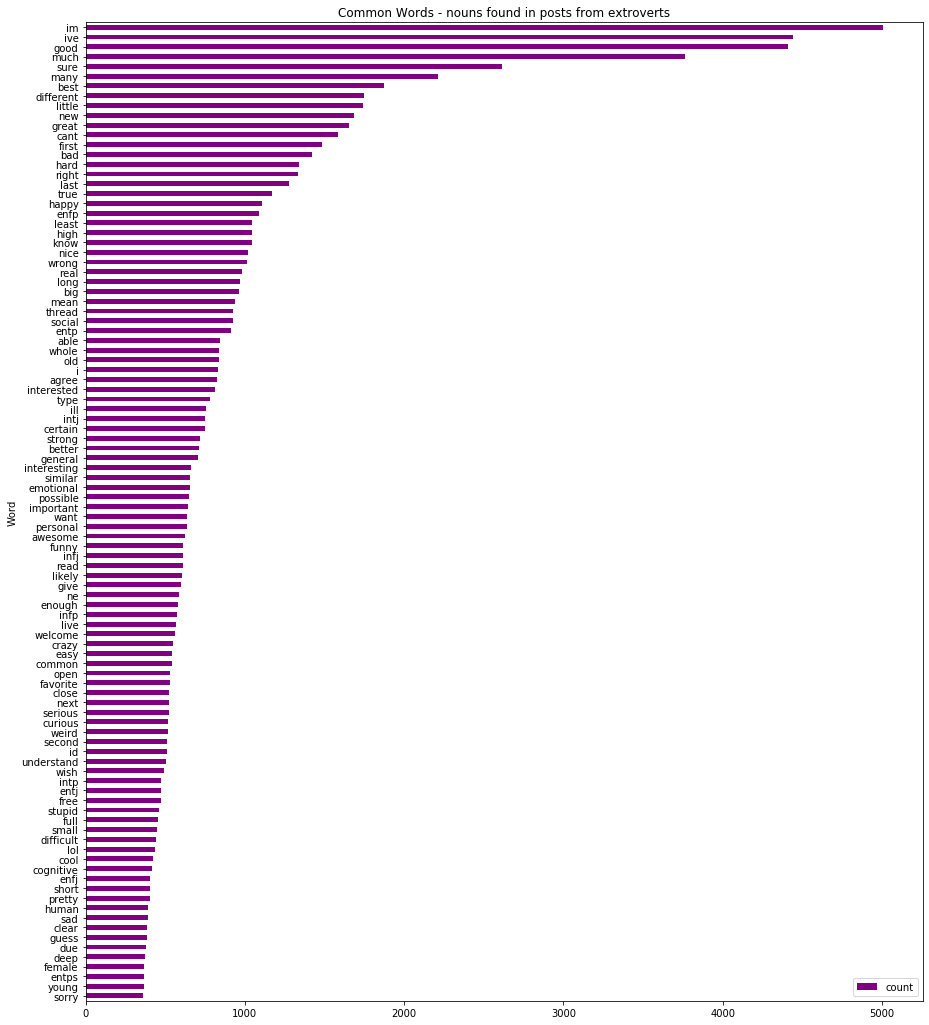

In [73]:
#let's look at common words graph

fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words - nouns found in posts from extroverts")
plt.show()

In [74]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

#make a string out of the top words 

<class 'str'>


In [75]:
!pip install textblob      #for installation

import textblob            #to import
!pip install wordcloud
from textblob import TextBlob, Word
from wordcloud import WordCloud

# make wordcloud

## wordcloud for just extroverts

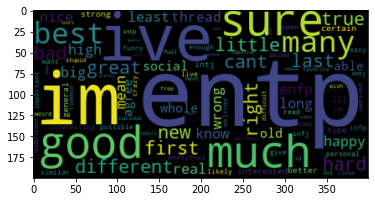

In [76]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()


In [77]:
fdist_pos2 = nltk.FreqDist(ex_pmi_scored) #making frequency dist
top_100_words5 = fdist_pos2.most_common(100)
print(top_100_words)

[(('im', 'JJ'), 5004), (('ive', 'JJ'), 4441), (('good', 'JJ'), 4409), (('much', 'JJ'), 3762), (('sure', 'JJ'), 2616), (('many', 'JJ'), 2214), (('best', 'JJS'), 1874), (('different', 'JJ'), 1746), (('little', 'JJ'), 1744), (('new', 'JJ'), 1688), (('great', 'JJ'), 1652), (('cant', 'JJ'), 1582), (('first', 'JJ'), 1484), (('bad', 'JJ'), 1424), (('hard', 'JJ'), 1339), (('right', 'JJ'), 1333), (('last', 'JJ'), 1280), (('true', 'JJ'), 1172), (('happy', 'JJ'), 1110), (('enfp', 'JJ'), 1090), (('least', 'JJS'), 1046), (('high', 'JJ'), 1045), (('know', 'JJ'), 1044), (('nice', 'JJ'), 1022), (('wrong', 'JJ'), 1011), (('real', 'JJ'), 980), (('long', 'JJ'), 971), (('big', 'JJ'), 960), (('mean', 'JJ'), 939), (('thread', 'JJ'), 928), (('social', 'JJ'), 923), (('entp', 'JJ'), 910), (('able', 'JJ'), 846), (('whole', 'JJ'), 840), (('old', 'JJ'), 838), (('i', 'JJ'), 832), (('agree', 'JJ'), 827), (('interested', 'JJ'), 810), (('type', 'JJ'), 778), (('ill', 'JJ'), 757), (('intj', 'JJ'), 750), (('certain', 'J

In [78]:
#listing top bigrams

top_infodf = pd.DataFrame(top_100_words5, columns = ('pos','count'))
top_infodf['Word'] = top_infodf['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_infodf = top_infodf.drop('pos',1) #drop the previous column

# top_infodf ['Word'] = top_infodf['Word'].apply(lambda x: ', '.join(x) if isinstance(x,tuple) else x)

top_infodf.head(20)

,count,Word
0,1,"((eerie, NN), (7w81w24w3, CD))"
1,1,"((downey, NN), (jr, NN))"
2,1,"((roller, NN), (coaster, NN))"
3,1,"((devils, NNS), (advocate, VBP))"
4,1,"((ups, JJ), (downs, NNS))"
5,1,"((nucky, JJ), (nucky, JJ))"
6,1,"((closest, VBP), (alternative, NN))"
7,1,"((pound, NN), (pound, NN))"
8,1,"((sxso, JJ), (musicbird, NN))"
9,1,"((inception, NN), (inception, NN))"


## do the same thing for the introvert df

In [79]:
dfin = df[df['energyquant'] != 1]


In [80]:
dfin.head()

,personality_type,energy,lower_posts,stopwords,lower_posts2,lower_postsnostopwords,lower_postsnostopwords2,new,lower_postswithoutpunc,lower_postsnolinks,char_count,text_lemmatized,energyquant
0,INFJ,I,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,236,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,'http://www.youtube.com/watch?v= |||http:// .m...,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...,intj moments sportscenter top ten plays pra...,2165,"['intj', 'moment', 'sportscenter', 'top', 'ten...",0
2,INTP,I,'good one _____ https://www.youtube.com/watch?...,359,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,'good one _____ https://www.youtube.com/watch?...,good one httpswwwyoutubecomwatchvfhigbolffgwo...,good one course say know thats blessing curs...,3226,"['good', 'one', 'course', 'say', 'know', 'that...",0
3,INTJ,I,"'dear intp, i enjoyed our conversation the oth...",491,"'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...","'dear intp, enjoyed conversation day. esoteric...",dear intp enjoyed conversation day esoteric ga...,dear intp enjoyed conversation day esoteric ga...,3827,"['dear', 'intp', 'enjoyed', 'conversation', 'd...",0
5,INTJ,I,'18/37 @.@|||science is not perfect. no scient...,717,'18/37 @.@|||science perfect. scientist claims...,'18/37 @.@|||science perfect. scientist claims...,'18/37 @.@|||science perfect. scientist claims...,' / @.@|||science perfect. scientist claims i...,1837 science perfect scientist claims is scien...,1837 science perfect scientist claims is scien...,5254,"['1837', 'science', 'perfect', 'scientist', 'c...",0
6,INFJ,I,"'no, i can't draw on my own nails (haha). thos...",620,"'no, can't draw nails (haha). done professiona...","'no, can't draw nails (haha). done professiona...","'no, can't draw nails (haha). done professiona...","'no, can't draw nails (haha). done professiona...",no cant draw nails haha done professionals nai...,no cant draw nails haha done professionals nai...,4799,"['no', 'cant', 'draw', 'nail', 'haha', 'done',...",0


In [81]:
dfin2 = dfin.drop(['personality_type','lower_posts','stopwords','lower_posts2','lower_postsnostopwords','lower_postsnostopwords2','new','lower_postswithoutpunc','char_count'], axis=1)


In [82]:
dfin2.head()

,energy,lower_postsnolinks,text_lemmatized,energyquant
0,I,intj moments sportscenter top ten plays pra...,"['intj', 'moment', 'sportscenter', 'top', 'ten...",0
2,I,good one course say know thats blessing curs...,"['good', 'one', 'course', 'say', 'know', 'that...",0
3,I,dear intp enjoyed conversation day esoteric ga...,"['dear', 'intp', 'enjoyed', 'conversation', 'd...",0
5,I,1837 science perfect scientist claims is scien...,"['1837', 'science', 'perfect', 'scientist', 'c...",0
6,I,no cant draw nails haha done professionals nai...,"['no', 'cant', 'draw', 'nail', 'haha', 'done',...",0


In [83]:
post_str2 = ' '.join(dfin2['lower_postsnolinks'].tolist())

print (type(post_str2))

<class 'str'>


In [84]:
#let's tokenize some stuff - bag of words

tokens2 = nltk.word_tokenize(post_str2)
print(len(tokens2))

4400948


In [85]:
tokens_pos2 = nltk.pos_tag(tokens2) #tagging pos in all the tokens plus the individual words themselves

In [86]:
# macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
# macbeth_stopped_freqdist.most_common(50)

# get freq dist of all the words in introverts - not filtered

fdist_pos4 = nltk.FreqDist(tokens_pos2) #making frequency dist
top_100_words4 = fdist_pos.most_common(100)
print(top_100_words4)

[(('im', 'JJ'), 5004), (('ive', 'JJ'), 4441), (('good', 'JJ'), 4409), (('much', 'JJ'), 3762), (('sure', 'JJ'), 2616), (('many', 'JJ'), 2214), (('best', 'JJS'), 1874), (('different', 'JJ'), 1746), (('little', 'JJ'), 1744), (('new', 'JJ'), 1688), (('great', 'JJ'), 1652), (('cant', 'JJ'), 1582), (('first', 'JJ'), 1484), (('bad', 'JJ'), 1424), (('hard', 'JJ'), 1339), (('right', 'JJ'), 1333), (('last', 'JJ'), 1280), (('true', 'JJ'), 1172), (('happy', 'JJ'), 1110), (('enfp', 'JJ'), 1090), (('least', 'JJS'), 1046), (('high', 'JJ'), 1045), (('know', 'JJ'), 1044), (('nice', 'JJ'), 1022), (('wrong', 'JJ'), 1011), (('real', 'JJ'), 980), (('long', 'JJ'), 971), (('big', 'JJ'), 960), (('mean', 'JJ'), 939), (('thread', 'JJ'), 928), (('social', 'JJ'), 923), (('entp', 'JJ'), 910), (('able', 'JJ'), 846), (('whole', 'JJ'), 840), (('old', 'JJ'), 838), (('i', 'JJ'), 832), (('agree', 'JJ'), 827), (('interested', 'JJ'), 810), (('type', 'JJ'), 778), (('ill', 'JJ'), 757), (('intj', 'JJ'), 750), (('certain', 'J

In [87]:
#list all these top words

top_words_df4 = pd.DataFrame(top_100_words4, columns = ('pos','count'))
top_words_df4['Word'] = top_words_df4['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df4 = top_words_df4.drop('pos',1) #drop the previous column
top_words_df4.head(20)

,count,Word
0,5004,im
1,4441,ive
2,4409,good
3,3762,much
4,2616,sure
5,2214,many
6,1874,best
7,1746,different
8,1744,little
9,1688,new


In [88]:
#try bigrams for all words
bigram_measures2 = nltk.collocations.BigramAssocMeasures()

In [89]:
infinder = BigramCollocationFinder.from_words(tokens_pos2)


In [90]:
in_pmi_scored = infinder.score_ngrams(bigram_measures.raw_freq)


In [91]:
in_pmi_scored[:50]

[((('!', '.'), ('!', '.')), 0.0021127266216278856),
 ((('feel', 'NN'), ('like', 'IN')), 0.0004262717941679838),
 ((('feel', 'VBP'), ('like', 'IN')), 0.0004215000949795362),
 ((('high', 'JJ'), ('school', 'NN')), 0.0003683297325939775),
 ((('im', 'JJ'), ('sure', 'JJ')), 0.0003556052014247839),
 ((('pretty', 'RB'), ('much', 'JJ')), 0.00035401463502863475),
 ((('would', 'MD'), ('say', 'VB')), 0.0003319739292534245),
 ((('can', 'MD'), ('not', 'RB')), 0.00031765883168808175),
 ((('even', 'RB'), ('though', 'IN')), 0.00031606826529193254),
 ((('would', 'MD'), ('like', 'VB')), 0.00031561381775017564),
 ((('seems', 'VBZ'), ('like', 'IN')), 0.00029539090214199303),
 ((('ive', 'JJ'), ('never', 'RB')), 0.00025903509880144003),
 ((('you', 'PRP'), ('!', '.')), 0.0002479011340283957),
 ((('!', '.'), ('i', 'NN')), 0.00024403832992346195),
 ((('long', 'JJ'), ('time', 'NN')), 0.000241084420902042),
 ((('years', 'NNS'), ('ago', 'RB')), 0.00024040274958940665),
 ((('im', 'NN'), ('going', 'VBG')), 0.0002383

In [92]:
fdist_pos3 = nltk.FreqDist(in_pmi_scored) #making frequency dist
top_100_words6 = fdist_pos3.most_common(100)
print(top_100_words6)

[(((('!', '.'), ('!', '.')), 0.0021127266216278856), 1), (((('feel', 'NN'), ('like', 'IN')), 0.0004262717941679838), 1), (((('feel', 'VBP'), ('like', 'IN')), 0.0004215000949795362), 1), (((('high', 'JJ'), ('school', 'NN')), 0.0003683297325939775), 1), (((('im', 'JJ'), ('sure', 'JJ')), 0.0003556052014247839), 1), (((('pretty', 'RB'), ('much', 'JJ')), 0.00035401463502863475), 1), (((('would', 'MD'), ('say', 'VB')), 0.0003319739292534245), 1), (((('can', 'MD'), ('not', 'RB')), 0.00031765883168808175), 1), (((('even', 'RB'), ('though', 'IN')), 0.00031606826529193254), 1), (((('would', 'MD'), ('like', 'VB')), 0.00031561381775017564), 1), (((('seems', 'VBZ'), ('like', 'IN')), 0.00029539090214199303), 1), (((('ive', 'JJ'), ('never', 'RB')), 0.00025903509880144003), 1), (((('you', 'PRP'), ('!', '.')), 0.0002479011340283957), 1), (((('!', '.'), ('i', 'NN')), 0.00024403832992346195), 1), (((('long', 'JJ'), ('time', 'NN')), 0.000241084420902042), 1), (((('years', 'NNS'), ('ago', 'RB')), 0.0002404

In [93]:
#listing top bigrams

top_infodf2 = pd.DataFrame(top_100_words6, columns = ('pos','count'))
top_infodf2['Word'] = top_infodf2['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_infodf2 = top_infodf2.drop('pos',1) #drop the previous column

# top_infodf ['Word'] = top_infodf['Word'].apply(lambda x: ', '.join(x) if isinstance(x,tuple) else x)

top_infodf2.head(20)

,count,Word
0,1,"((!, .), (!, .))"
1,1,"((feel, NN), (like, IN))"
2,1,"((feel, VBP), (like, IN))"
3,1,"((high, JJ), (school, NN))"
4,1,"((im, JJ), (sure, JJ))"
5,1,"((pretty, RB), (much, JJ))"
6,1,"((would, MD), (say, VB))"
7,1,"((can, MD), (not, RB))"
8,1,"((even, RB), (though, IN))"
9,1,"((would, MD), (like, VB))"


In [94]:
# mutual info scores

inpmi_finder = BigramCollocationFinder.from_words(tokens_pos2)
inpmi_finder.apply_freq_filter(10)

In [95]:
in_pmi_scored = inpmi_finder.score_ngrams(bigram_measures.pmi)


In [96]:
in_pmi_scored

[((('giga', 'VBD'), ('blender', 'VB')), 18.747454799910393),
 ((('mon', 'FW'), ('gti9515', 'NN')), 18.4844203940766),
 ((('mockingbird', 'FW'), ('harper', 'JJR')), 18.368943176656664),
 ((('bungee', 'IN'), ('jumpingskydiving', 'VBG')), 18.36894317665666),
 ((('fone', 'NN'), ('ola', 'NN')), 18.36894317665666),
 ((('dalai', 'NN'), ('lama', 'NN')), 18.346916870326666),
 ((('brodyadrien', 'NN'), ('brodyadrien', 'NN')), 18.253465959236724),
 ((('puella', 'NN'), ('magi', 'NN')), 17.899457893355446),
 ((('winnie', 'NN'), ('pooh', 'NN')), 17.89945789335544),
 ((('whats', 'VBN'), ('subtype', 'RB')), 17.806348488963962),
 ((('aldous', 'JJ'), ('huxley', 'NN')), 17.759527632210965),
 ((('jimi', 'NN'), ('hendrix', 'NN')), 17.740911954043618),
 ((('monte', 'NN'), ('cristo', 'NN')), 17.566882554268574),
 ((('jrr', 'VBP'), ('tolkien', 'JJ')), 17.54582093874074),
 ((('forrest', 'JJS'), ('gump', 'NN')), 17.534461076576193),
 ((('rhubarb', 'NN'), ('rhubarb', 'NN')), 17.512989546273367),
 ((('los', 'NN'),

In [97]:
#look at demographic of parts of speech

pos_df2 = pd.DataFrame(tokens_pos2,columns = ('word','POS')) 

pos_sum2 = pos_df2.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum2.sort_values(['word'],ascending=[False])# in descending order of number of words per tag

##ignore the , and ,, that was from the list of lemmatized text

## why is this list the same as extrovert besides the numbers? slightly different but still all the same words
# in just a different order

,POS,word
13,NN,1222332
9,JJ,825269
21,RB,426688
16,NNS,396490
32,VBP,307441
30,VBG,188104
28,VB,163065
29,VBD,148790
8,IN,143809
4,CD,98820


In [98]:
#getting just the adverbs

filtered_pos2 = [] #all the nouns
for one in tokens_pos2:
#     if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
#     if one[1] == 'RB' or one[1] == 'RBR' or one[1] == 'RBS':
    if one[1] == 'JJ' or one[1] == 'JJR' or one[1] == 'JJS':

        filtered_pos2.append(one)
print (len(filtered_pos2))

filtered_pos2[:5]

857158


[('intj', 'JJ'),
 ('top', 'JJ'),
 ('lifechanging', 'JJ'),
 ('todaymay', 'JJ'),
 ('last', 'JJ')]

In [99]:
#the most common adverbs

fdist_pos2 = nltk.FreqDist(filtered_pos2) #making frequency dist
top_100_words2 = fdist_pos2.most_common(10)
print(top_100_words2)

[(('im', 'JJ'), 16363), (('ive', 'JJ'), 15423), (('good', 'JJ'), 14318), (('much', 'JJ'), 12718), (('sure', 'JJ'), 8085), (('many', 'JJ'), 7722), (('little', 'JJ'), 6022), (('different', 'JJ'), 5952), (('cant', 'JJ'), 5594), (('best', 'JJS'), 5566)]


In [100]:
#listing top adverbs

top_words_df2 = pd.DataFrame(top_100_words2, columns = ('pos','count'))
top_words_df2['Word'] = top_words_df2['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df2 = top_words_df2.drop('pos',1) #drop the previous column
top_words_df2.head(10)

,count,Word
0,16363,im
1,15423,ive
2,14318,good
3,12718,much
4,8085,sure
5,7722,many
6,6022,little
7,5952,different
8,5594,cant
9,5566,best


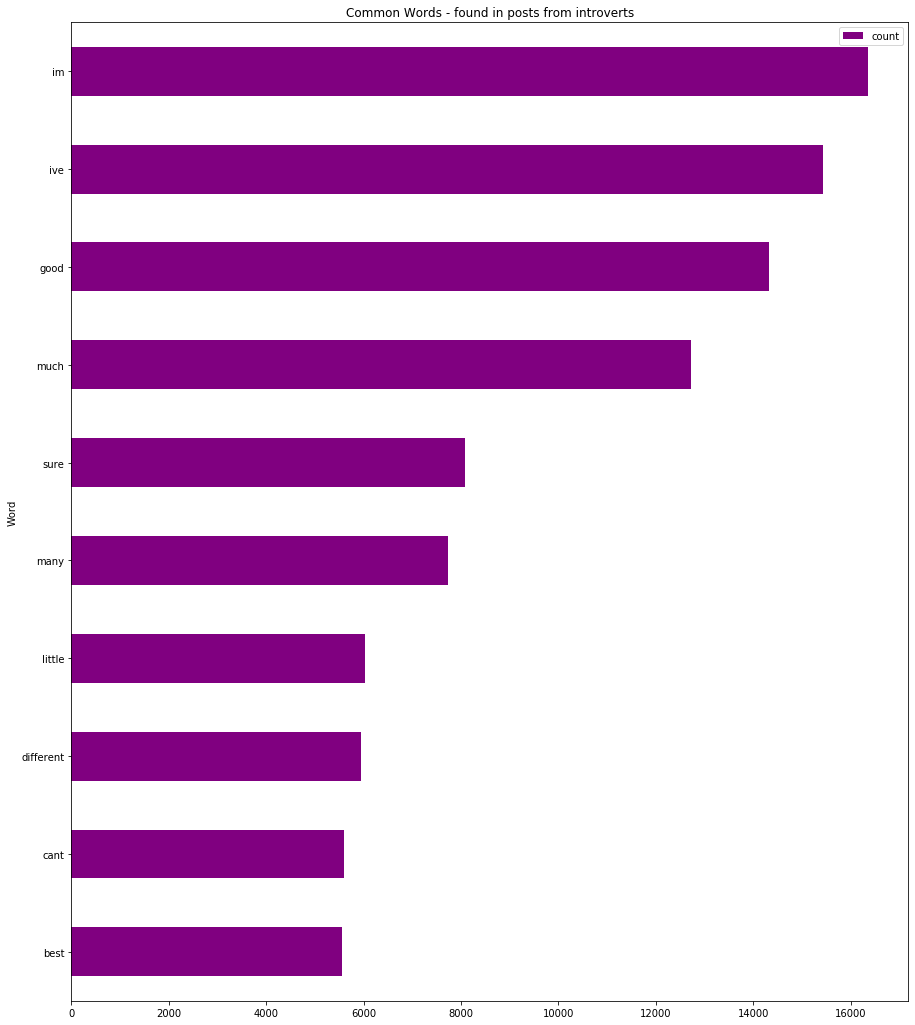

In [101]:
#let's look at common words adverbs graph

fig, ax = plt.subplots(figsize=(15,18))
top_words_df2.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words - found in posts from introverts")
plt.show()

In [102]:
word_counts2 = ' '.join(top_words_df2['Word'].tolist())
print(type(word_counts2))

#make a string out of the top words 

<class 'str'>


## wordcloud for just introverts


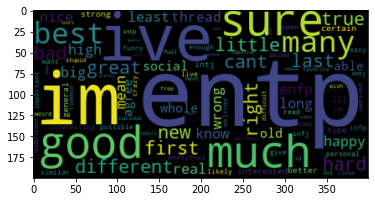

In [103]:
wordcloud2 = WordCloud().generate(word_counts2)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()

### We can see that the wordcloud for just introverts and extroverts is quite similar, and the most frequently used words are similar between them. 

We can also see that though the top words are similar, both results are significantly different from the top words when pooled together introverts and extroverts. If we had more time, we could explore the implications of this.


## Summary of key word differences between introverts and extroverts in this dataset

"!!" is more common in extroverts - .004 freq vs .002, though it was the top bigram for both groups.

"me!" - shows up 1.5x in extroverts - .000229 vs .000148


## Bigrams that exclusively show up in extroverts vs introverts:

### Extroverts - phrases that do not show up in introverts' top bigrams
"iphone using" 

“too!” 

"things like"

### Introverts - phrases that do not show up in extroverts' top bigrams


"i’ve ever" 

"every time" 

"never really"




## Mutual information scores that exclusively show up in extroverts vs introverts:

These are completely different results with little to no crossover in the top results for each group.

### Extroverts - phrases that do not show up in introverts' top pmi

closest alternative 

roller coaster

ups, downs

pound, pound

hip hop

pros, cons

vice, versa

serial killers

sherlock holmes

harry potter

downey jr - top one

grain salt 

donald trump


### Introverts - phrases that do not show up in extroverts' top pmi

giga blender - top one

whats subtype

monte cristo

jrr tolkien

forrest gump

los angeles

englishlanguage, arts

sodium,sodium

mockingbird,harper

bungee jumpingskydiving

dalai lama

winnie pooh

### We can see that many of the introverts' top mutual information scores contain literary references, more so than those of the extroverts'. This may be worth investigating further, as there have been prior claims of correlation between introversion and significant literary interest, though it's important to note that this is not causation. 



## Let's look back at our OkCupid dataset and see if we can make some predictions on that data

In [104]:
# Re-running our last model that seemed to work the best

nb = MultinomialNB()

nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))


Multinomial Naive Bayes
Training Accuracy: 0.9283 		 Testing Accuracy: 0.6923

[[1531  693]
 [ 188  451]]
0.6922808243101641
1531 693 188 451
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2224
           1       0.39      0.71      0.51       639

    accuracy                           0.69      2863
   macro avg       0.64      0.70      0.64      2863
weighted avg       0.78      0.69      0.72      2863



In [105]:
okcupid_df = pd.read_csv('okcupidrevised.csv',index_col=0)


okcupid_df.head()


,age,sex,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essay9revised,stopwords,essay9nostop,essay9nopunc,char_count,text_lemmatized
0,22,m,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,you want to be swept off your feet! you are ti...,18,want swept feet! tired norm. want catch coffee...,want swept feet! tired norm want catch coffee ...,71,"['want', 'swept', 'feet!', 'tired', 'norm', 'w..."
5,29,m,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,you're awesome.,1,awesome.,awesome,7,['awesome']
9,37,m,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,you can rock the bells,3,rock bells,rock bells,10,"['rock', 'bell']"
10,35,m,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,you are a complex woman with healthy self-este...,49,complex woman healthy self-esteem. intelligent...,complex woman healthy selfesteem intelligent f...,397,"['complex', 'woman', 'healthy', 'selfesteem', ..."
11,28,m,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","if you know who you are, who you want, where y...",31,"know are, want, life going. also, i'm genuine ...",know are want life going also im genuine guy g...,161,"['know', 'are', 'want', 'life', 'going', 'also..."


In [106]:
X = okcupid_df['essay9nopunc']


In [107]:
vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize



In [108]:
# okcupidx_train = vectorizer.fit(X) #transformed the data


In [109]:
#setting target features for okcupid dataset


# okcupid_df['predictions'] 

# nb = MultinomialNB()

# nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
# nb_okcupid_preds = nb_classifier.predict(X)

# prob_0 = pred_probs[:,0]
# prob_1 = pred_probs[:,1]


# # print(f"Now predicting labels for unlabeled data...")

# #     pred_probs = clf.predict_proba(X_unlabeled)
# #     preds = clf.predict(X_unlabeled)
# #     prob_0 = pred_probs[:,0]
# #     prob_1 = pred_probs[:,1]



In [111]:
# Store predictions and probabilities in dataframe
#     df_pred_prob = pd.DataFrame([])
#     df_pred_prob['preds'] = preds
#     df_pred_prob['prob_0'] = prob_0
#     df_pred_prob['prob_1'] = prob_1
#     df_pred_prob.index = X_unlabeled.index

# Conclusions

1) When comparing all top nouns, all top adverbs, all top adjectives and all top words for each group of introverts vs extroverts, we found that the most frequently used words were quite similar between the groups, with slight variations in order. However, when the introverts and extroverts are combined, the list of top words is significantly different than either of the 2 groups' separate lists - for all top words, top nouns, etc. 

2) Since all top words are similar when comparing introverts vs extroverts, do not attempt to create separate marketing campaigns at this point

3) We can see that many of the introverts' top mutual information scores contain literary references, more so than those of the extroverts'. 

4) There is some amount of similarity between bigrams of introverts vs extroverts; however there are several phrases that are unique to each group, that do not appear in the top 50 bigrams of the other group. For example, "too" with "!" shows up very frequently relatively in the extroverts, and does not appear in the top results of introverts at all.

# Future Work


1) Explore why there is such a difference between introvert/extroverts' combined top words as one group, versus only introverts or only extroverts' top words - especially when there isn't much difference between introverts' and extroverts' separate group results.

2) Investigate further regarding the higher proportion of introverts' top mutual information scores containing literary references, as there have been prior claims of correlation between introversion and significant literary interest, though it's important to note that this is not causation. This may lead into another confounding variable.

3) Create a formula that takes into account how often each person uses introvert and extrovert's separate groups of top bigrams or bigrams with top mutual information scores, and use these numbers on further unlabelled datasets to predict their introversion / extroversion based on their texts. Particularly the OkCupid dating profile dataset from Kaggle - this contains many pieces of valuable demographic and special interest/hobby data as well that could be informative.

4) Incorporate this data as part of a larger project on building a friendship-prediction algorithm.